In [9]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from salishsea_tools import viz_tools

%matplotlib inline

In [12]:
tmask = xr.open_dataset('/Users/sallen/Documents/MEOPAR/grid/mesh_mask201702.nc').tmask

## Daily Means, June 18, 2020

In [84]:
gridT = xr.open_dataset('/Users/sallen/Documents/MEOPAR/Results/SalishSea_1d_20200618_20200618_grid_T.nc')
gridU = xr.open_dataset('/Users/sallen/Documents/MEOPAR/Results/SalishSea_1d_20200618_20200618_grid_U.nc')
gridV = xr.open_dataset('/Users/sallen/Documents/MEOPAR/Results/SalishSea_1d_20200618_20200618_grid_V.nc')
Uvel = viz_tools.unstagger_xarray(gridU.vozocrtx, 'x')
Vvel = viz_tools.unstagger_xarray(gridV.vomecrty, 'y')

0.9630901


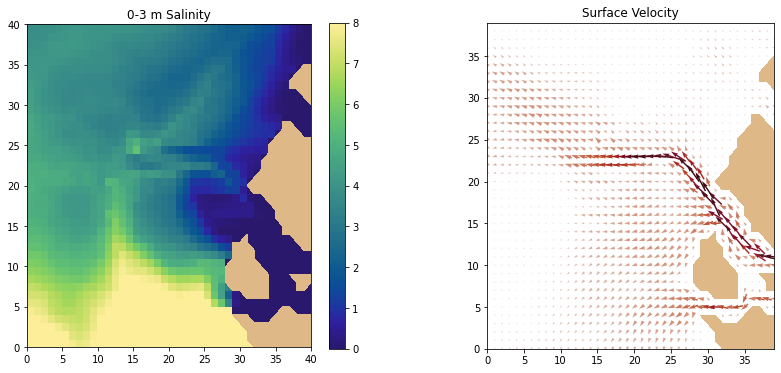

In [85]:
hour = 0
imin, imax = 405, 445
jmin, jmax = 280, 320
skip = 1
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
cmap = cm.haline
color = axs[0].pcolormesh(gridT.vosaline[hour, 0:3, imin:imax, jmin:jmax].mean(axis=0), 
                                 cmap=cm.haline, vmax=10)
axs[0].contourf(tmask[0, 0, imin:imax, jmin:jmax+1], [-0.01, 0.01], colors='burlywood')
fig.colorbar(colour, ax=axs[0])
axs[0].set_title('0-3 m Salinity')
pU, pV = (np.ma.masked_array(Uvel[hour, 0, imin:imax:skip, jmin:jmax:skip], 
                                 mask=1-tmask[0, 0, imin:imax:skip, jmin:jmax:skip]),
              np.ma.masked_array(Vvel[hour, 0, imin:imax:skip, jmin:jmax:skip], 
                                 mask=1-tmask[0, 0, imin:imax:skip, jmin:jmax:skip])
                                )
speeds = np.sqrt(np.square(pU) + np.square(pV))
quiver = axs[1].quiver(pU, pV, speeds, cmap=cm.amp, pivot='mid', width=0.005)
print (speeds.max())
axs[1].quiverkey(quiver, 45, 25, 1, '1 m/s', coordinates='data', color='red', labelcolor='red')
axs[1].contourf(tmask[0, 0, imin:imax, jmin:jmax], [-0.01, 0.01], colors='burlywood')
axs[1].set_title('Surface Velocity')
for ax in axs:
    viz_tools.set_aspect(ax);

##  2 hours after Peak Ebb, 18:30 UTC June 18, 2020

In [44]:
gridT = xr.open_dataset('/Users/sallen/Documents/MEOPAR/Results/SalishSea_1h_20200618_20200618_grid_T.nc')
gridU = xr.open_dataset('/Users/sallen/Documents/MEOPAR/Results/SalishSea_1h_20200618_20200618_grid_U.nc')
gridV = xr.open_dataset('/Users/sallen/Documents/MEOPAR/Results/SalishSea_1h_20200618_20200618_grid_V.nc')
Uvel = viz_tools.unstagger_xarray(gridU.vozocrtx, 'x')
Vvel = viz_tools.unstagger_xarray(gridV.vomecrty, 'y')

1.4694614


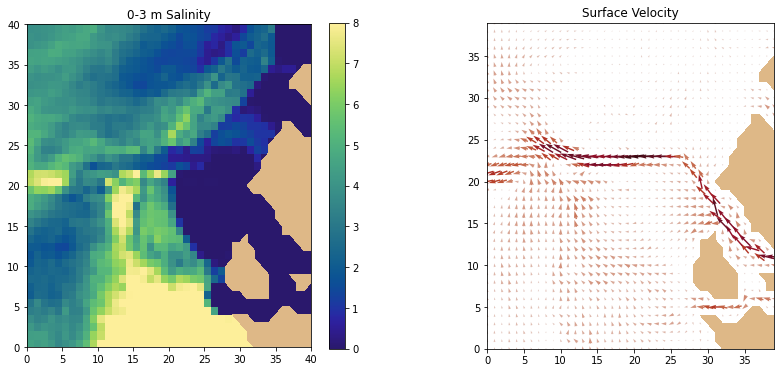

In [83]:
hour = 18
imin, imax = 405, 445
jmin, jmax = 280, 320
skip = 1
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
cmap = cm.haline
color = axs[0].pcolormesh(gridT.vosaline[hour, 0:3, imin:imax, jmin:jmax].mean(axis=0), 
                                 cmap=cm.haline, vmax=10)
axs[0].contourf(tmask[0, 0, imin:imax, jmin:jmax+1], [-0.01, 0.01], colors='burlywood')
fig.colorbar(colour, ax=axs[0])
axs[0].set_title('0-3 m Salinity')
pU, pV = (np.ma.masked_array(Uvel[hour, 0, imin:imax:skip, jmin:jmax:skip], 
                                 mask=1-tmask[0, 0, imin:imax:skip, jmin:jmax:skip]),
              np.ma.masked_array(Vvel[hour, 0, imin:imax:skip, jmin:jmax:skip], 
                                 mask=1-tmask[0, 0, imin:imax:skip, jmin:jmax:skip])
                                )
speeds = np.sqrt(np.square(pU) + np.square(pV))
quiver = axs[1].quiver(pU, pV, speeds, cmap=cm.amp, pivot='mid', width=0.005)
print (speeds.max())
axs[1].quiverkey(quiver, 45, 25, 1, '1 m/s', coordinates='data', color='red', labelcolor='red')
axs[1].contourf(tmask[0, 0, imin:imax, jmin:jmax], [-0.01, 0.01], colors='burlywood')
axs[1].set_title('Surface Velocity')
for ax in axs:
    viz_tools.set_aspect(ax);